In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

from google.colab import drive

# Mount Google Drive
drive.mount('/content/gdrive', force_remount=True)

gdrive_path_root = '/content/gdrive/MyDrive/Robust DevOps: Chiemsee'

graphs_folder = os.path.join(gdrive_path_root, 'graphs')
csv_folder = os.path.join(gdrive_path_root, 'sorted-results')

Mounted at /content/gdrive


Saving allprojects_dot.png


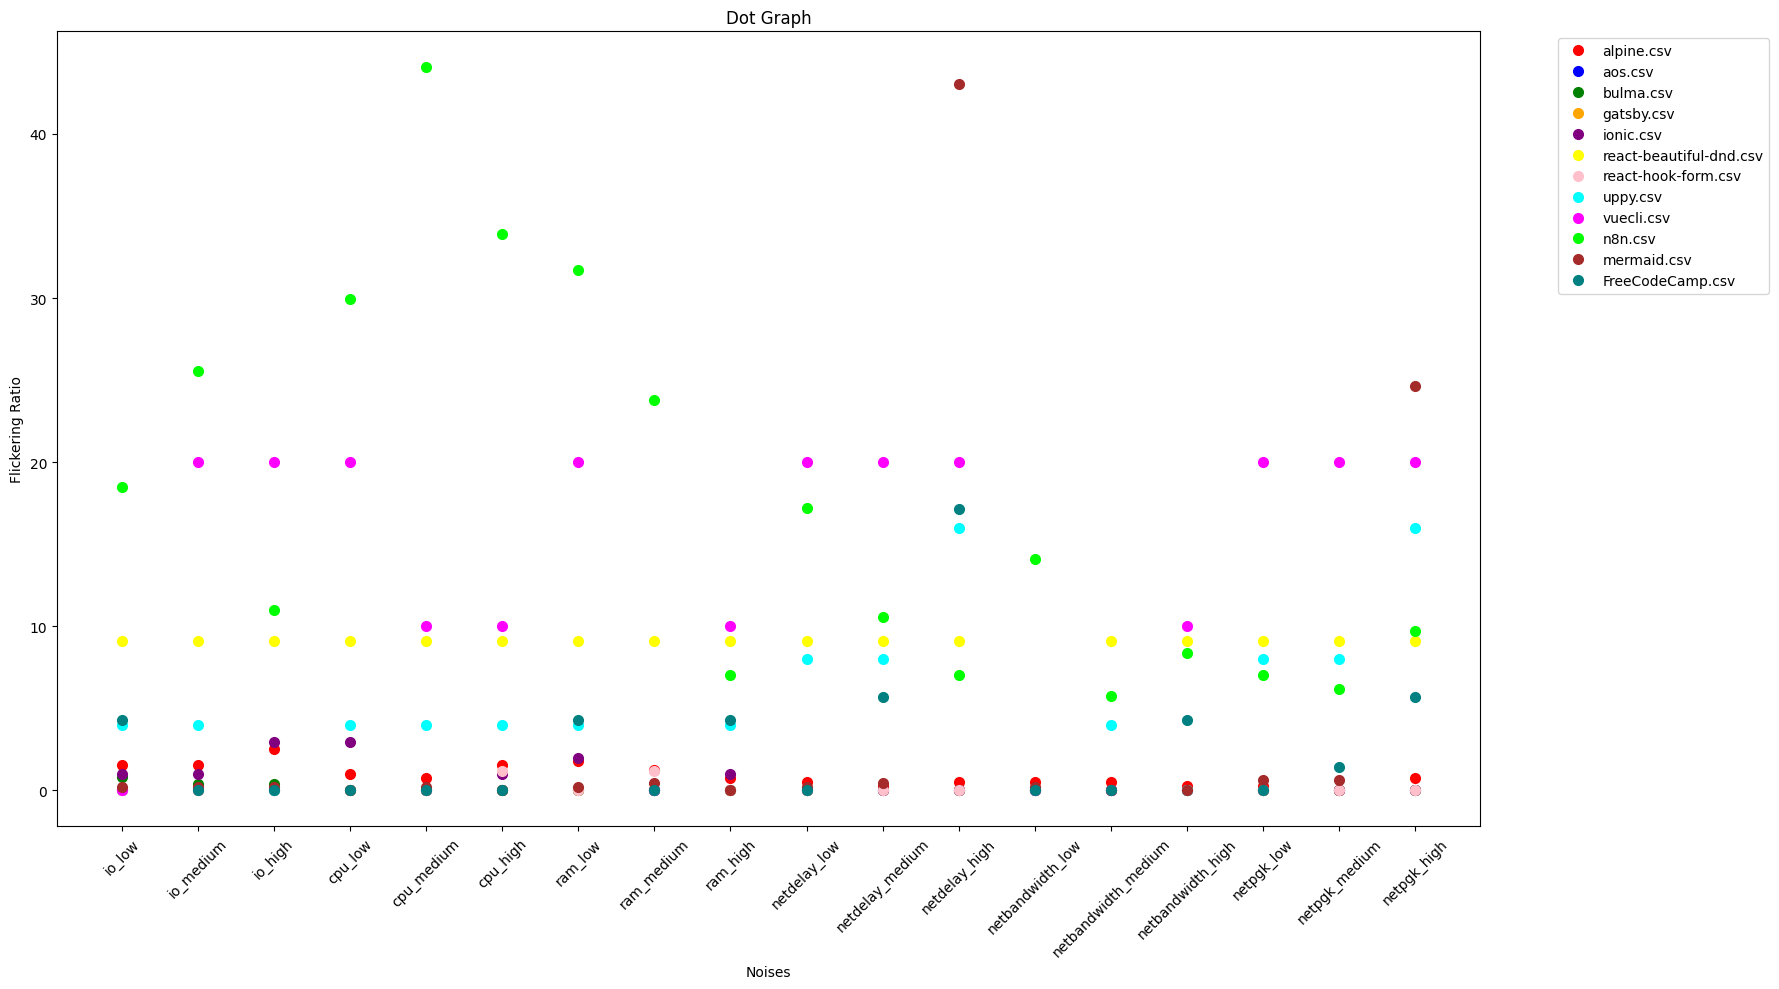

In [2]:
csv_files = [file for file in os.listdir(csv_folder) if file.endswith('.csv')]

sorted_noise_list = [f"{noise}_{level}" for noise in ['io', 'cpu', 'ram', 'netdelay', 'netbandwidth', 'netpgk']
                     for level in ['low', 'medium', 'high']]


# list of colors. 20 colors since we have 20 proejcts
colors = ['red', 'blue', 'green', 'orange', 'purple', 'yellow', 'pink', 'cyan', 'magenta', 'lime', 'brown', 'teal', 'navy', 'olive', 'maroon', 'gray', 'indigo', 'salmon', 'gold', 'black']

# Define the function to plot the dot graph
def plot_dot_graph(csv_files, colors):
    fig = plt.figure(figsize=(15, 10))

    for i, csv_file in enumerate(csv_files):
        data = pd.read_csv(os.path.join(csv_folder, csv_file), index_col=0)
        data = data.reindex(sorted_noise_list)
        plt.plot(data['ratio_positive'], 'o', markersize=7, label=csv_file, color=colors[i % len(colors)])

    # Customization for better visualization
    plt.xticks(range(len(sorted_noise_list)), sorted_noise_list, rotation=90)
    plt.xlabel('Noises')
    plt.ylabel('Flickering Ratio')
    plt.title('Dot Graph')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

    # Save the graph
    filename =  "allprojects_dot.png"
    filepath = os.path.join(graphs_folder, filename)
    print(f"Saving {filename}")
    plt.savefig(filepath, bbox_inches = 'tight', dpi=300)

    plt.show()

plot_dot_graph(csv_files, colors)

In [3]:

sorted_noise_list = [f"{noise}_{level}" for noise in ['io', 'cpu', 'ram', 'netdelay', 'netbandwidth', 'netpgk']
                     for level in ['low', 'medium', 'high']]

In [4]:
sorted_noise_list

['io_low',
 'io_medium',
 'io_high',
 'cpu_low',
 'cpu_medium',
 'cpu_high',
 'ram_low',
 'ram_medium',
 'ram_high',
 'netdelay_low',
 'netdelay_medium',
 'netdelay_high',
 'netbandwidth_low',
 'netbandwidth_medium',
 'netbandwidth_high',
 'netpgk_low',
 'netpgk_medium',
 'netpgk_high']